In [157]:
import numpy as np
import pandas as pd
import spacy
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import Perceptron, LogisticRegression

## Reading Data

Original Data

In [158]:
original_data = pd.read_excel('global_warming_tweets.xls')
original_data.drop_duplicates(subset=["tweet"], inplace=True)

data = original_data

data.head()

,tweet,existence,existence.confidence
0,Global warming report urges governments to act...,Yes,1.0000
1,Fighting poverty and global warming in Africa ...,Yes,1.0000
2,Carbon offsets: How a Vatican forest failed to...,Yes,0.8786
4,URUGUAY: Tools Needed for Those Most Vulnerabl...,Yes,0.8087
5,RT @sejorg: RT @JaymiHeimbuch: Ocean Saltiness...,Yes,1.0000


Web Scraped Data

In [159]:
# rawScrapedTweets = []

# with open("scrapedTweets.txt") as fh:
#     d = fh.read()
#     rawScrapedTweets = d.split('\n')

# scrapedTweets = pd.DataFrame(rawScrapedTweets, columns=["tweets"])

# print(scrapedTweets.shape)
# scrapedTweets.head()

## Testing

Data Exploration

<BarContainer object of 2 artists>

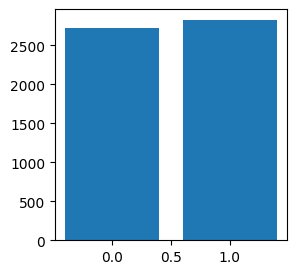

In [160]:
size = len(data["existence"])
cnt = [0, 0]

for val in data["existence"]:
    if pd.isnull(val) or val == "N" or val == "No":
        cnt[0] += 1
    else:
        cnt[1] += 1

plt.figure(figsize=(3,3))
plt.bar([0, 1], cnt)

Running Algorithms

In [161]:
%run ./jlu_preprocessing.ipynb

X, Y = preprocess(data)

In [162]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

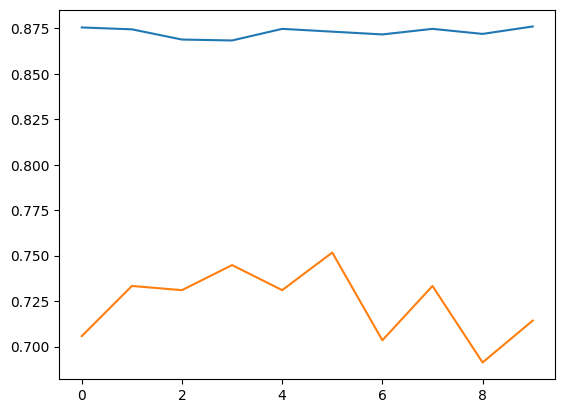

In [163]:
# model = DecisionTreeClassifier()
model = LogisticRegression()
# model = Perceptron()

cv = cross_validate(model, X_train, Y_train, cv=10, return_estimator=True, return_train_score=True)

clf = model.fit(X_train, Y_train)
pred = model.predict(X_train)
pred2 = model.predict(X_test)

plt.plot(cv["train_score"])
plt.plot(cv["test_score"])
plt.show()

In [164]:
from sklearn.metrics import accuracy_score

print("Training accuracy: ", accuracy_score(Y_train, pred))
print("Testing accuracy: ", accuracy_score(Y_test, pred2))

Training accuracy:  0.8677552897884084
Testing accuracy:  0.718491260349586


In [165]:
## Logistic Regression
# Training accuracy: 0.8754008245533669
# Testing accuracy:  0.0.7161172161172161

## Perceptron
# Training accuracy:  0.9573980760421439
# Testing accuracy:  0.7014652014652014